<a href="https://colab.research.google.com/github/BingHungLee/BHAI-Daily-Practice/blob/main/%5B20210705%5D_Boston_Housing_Price_Prediction_with_Feed_Forward_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boston Housing Price Prediction with Feed Forward Neural Networks

Reference: https://github.com/glingden/Boston-House-Price-Prediction/blob/master/house_price_prediction.ipynb

In [29]:
#import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [30]:
#load the data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV' ]
house_df =  pd.read_csv(url, sep= '\s+', names=col_names )
house_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [31]:
'''====== Data Exploration and Preprocessing ======'''

#shape of dataframe
house_df.shape

(506, 14)

In [32]:
#check there are any NAN values
house_df.isnull().values.any()

False

In [33]:
'''=== show the statistics analysis of each attributes ==='''

#descriptive statistics 
house_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


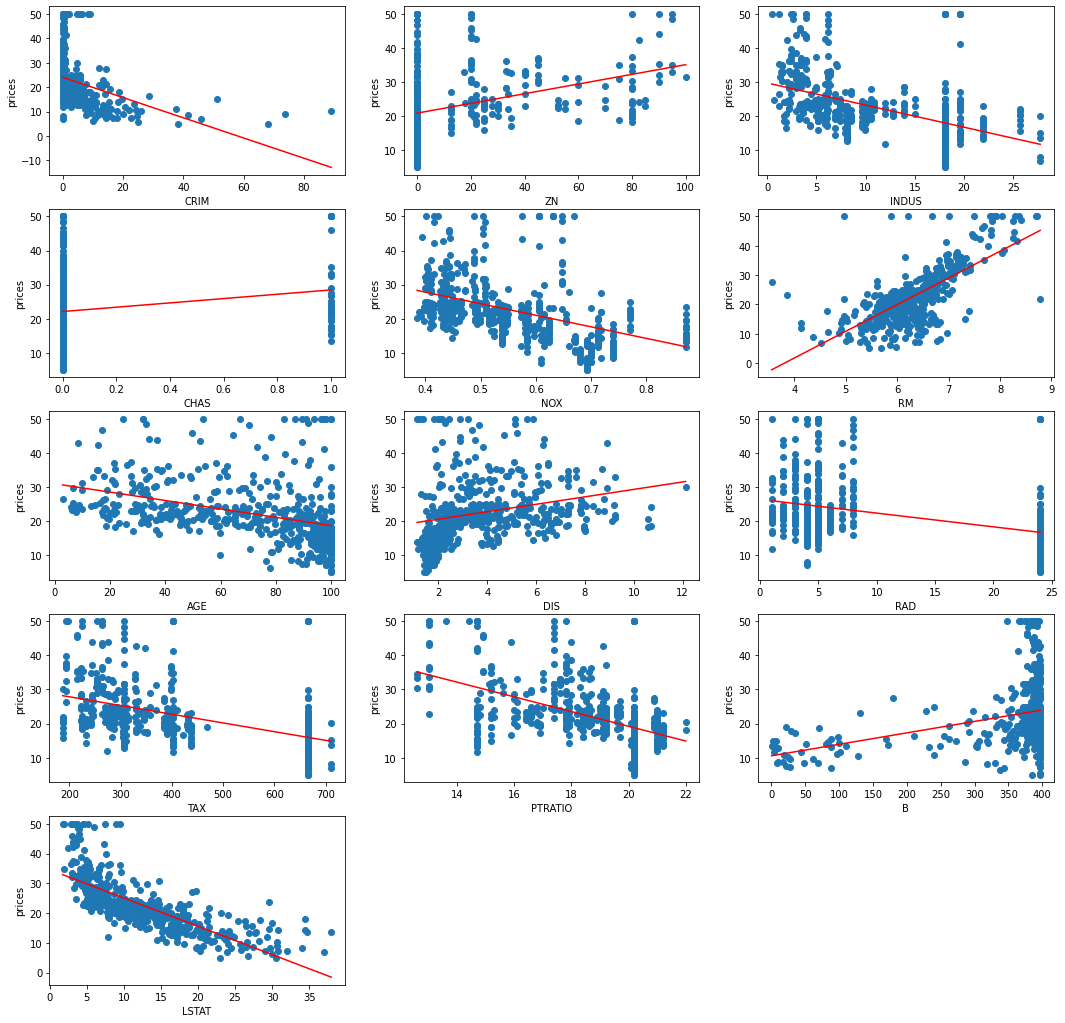

In [34]:
'''=== Show the linear relationship between features  and price (MEDV). Thus, it provides that how the scattered 
      they are and which features has more impact in prediction of house price. ==='''

# visiualize all variables  with price(MEDV)
from scipy import stats
#creates figure
plt.figure(figsize=(18, 18))

for i, col in enumerate(house_df.columns[0:13]): #iterates over all columns except for price column (last one)
    plt.subplot(5, 3, i+1) # each row three figure
    x = house_df[col] #x-axis
    y = house_df['MEDV'] #y-axis
    plt.plot(x, y, 'o')
    
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1)) (np.unique(x)), color='red')
    plt.xlabel(col) # x-label
    plt.ylabel('prices') # y-label

In [35]:
# separate the training and target variable
feature = house_df.iloc[:,0:13] #  training variables
target = house_df.iloc[:,13] # target varible
print(feature.head())
print('\n',target.head())

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31     0  0.538  ...    1  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07     0  0.469  ...    2  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07     0  0.469  ...    2  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18     0  0.458  ...    3  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18     0  0.458  ...    3  222.0     18.7  396.90   5.33

[5 rows x 13 columns]

 0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


In [36]:

'''=== Noramlization the features. Since it is seen that features have different ranges, it is best practice to
normalize/standarize the feature before using them in the model ==='''

#feature normalization
normalized_feature =  keras.utils.normalize(feature.values)
print(normalized_feature)

[[1.26388341e-05 3.59966795e-02 4.61957387e-03 ... 3.05971776e-02
  7.93726783e-01 9.95908132e-03]
 [5.78529889e-05 0.00000000e+00 1.49769546e-02 ... 3.77071843e-02
  8.40785474e-01 1.93620036e-02]
 [5.85729947e-05 0.00000000e+00 1.51744622e-02 ... 3.82044450e-02
  8.43137761e-01 8.64965806e-03]
 ...
 [1.23765824e-04 0.00000000e+00 2.43009593e-02 ... 4.27762066e-02
  8.08470305e-01 1.14884669e-02]
 [2.24644719e-04 0.00000000e+00 2.44548909e-02 ... 4.30471676e-02
  8.06519433e-01 1.32831260e-02]
 [9.69214289e-05 0.00000000e+00 2.43887924e-02 ... 4.29308164e-02
  8.11392431e-01 1.61092778e-02]]


In [37]:
'''==== Multi-Layer Perception architecture is used for prediction of house price ===='''

# shuffle and split data into train (~80%) and test (~20%)
X_train, X_test, y_train, y_test = train_test_split(normalized_feature, target.values, 
                                                    test_size=0.2, random_state=42) 
print('training data shape: ',X_train.shape)
print('testing data shape: ',X_test.shape)

training data shape:  (404, 13)
testing data shape:  (102, 13)


In [38]:
'''===== Build MLP Network ====='''

#get number of columns in training data
n_cols = X_train.shape[1]

# builds model
model = keras.Sequential()

model.add(keras.layers.Dense(150, activation=tf.nn.relu, 
                       input_shape=(n_cols,)))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(1))

#compile model
model.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error

#inspect the model
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 150)               2100      
_________________________________________________________________
dense_29 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_30 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_31 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_32 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 151       
Total params: 92,851
Trainable params: 92,851
Non-trainable params: 0
_________________________________________________

In [39]:
#train model and perform validation test

early_stop = EarlyStopping(monitor='val_loss', patience=15) # stops training when it doesn't show improvemnet.

history = model.fit(X_train, y_train, epochs=300, 
          validation_split=0.2, verbose=1, callbacks=[early_stop])

Epoch 1/300
11/11 [==============================] - 1s 16ms/step - loss: 602.2415 - mae: 22.5961 - val_loss: 496.3245 - val_mae: 20.6530
Epoch 2/300
11/11 [==============================] - 0s 5ms/step - loss: 437.1888 - mae: 18.5233 - val_loss: 147.7881 - val_mae: 9.3729
Epoch 3/300
11/11 [==============================] - 0s 6ms/step - loss: 140.6141 - mae: 9.6952 - val_loss: 78.4652 - val_mae: 7.3444
Epoch 4/300
11/11 [==============================] - 0s 5ms/step - loss: 94.5574 - mae: 6.9939 - val_loss: 66.1916 - val_mae: 5.2841
Epoch 5/300
11/11 [==============================] - 0s 5ms/step - loss: 78.4338 - mae: 6.6993 - val_loss: 68.8728 - val_mae: 6.7309
Epoch 6/300
11/11 [==============================] - 0s 5ms/step - loss: 73.2983 - mae: 6.5070 - val_loss: 59.9184 - val_mae: 4.9337
Epoch 7/300
11/11 [==============================] - 0s 5ms/step - loss: 71.2149 - mae: 5.8549 - val_loss: 63.2791 - val_mae: 6.1663
Epoch 8/300
11/11 [==============================] - 0s 5ms/

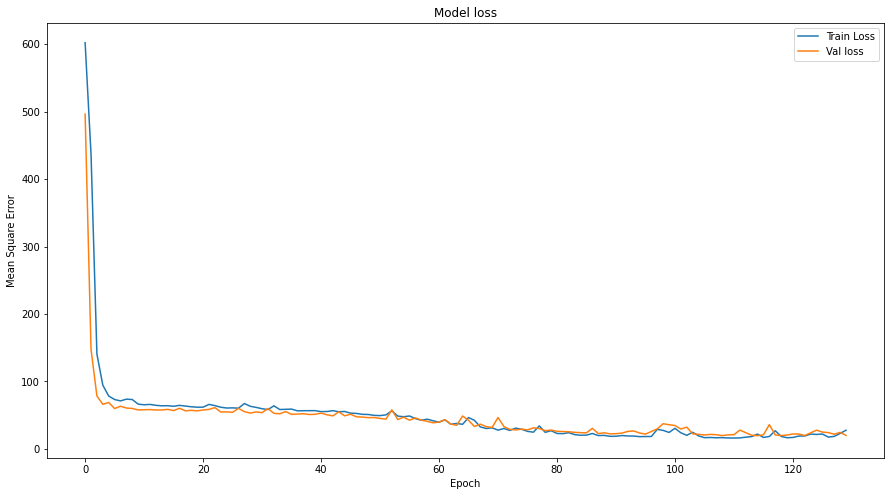

In [40]:
# show the graph of model loss in trainig and validation 

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(history.epoch, history.history['loss'],
           label='Train Loss')
plt.plot(history.epoch, history.history['val_loss'],
           label = 'Val loss')
plt.title('Model loss')
plt.legend()

In [41]:
#check the model performace in test dataset
score = model.evaluate(X_test, y_test, verbose=1)
print('loss value: ', score[0])
print('Mean absolute error: ', score[1])

4/4 [==============================] - 0s 3ms/step - loss: 16.3560 - mae: 2.5728
loss value:  16.355974197387695
Mean absolute error:  2.572824716567993


In [42]:
'''=== predict the house price ==='''

# predict house price using the test data 
test_predictions = model.predict(X_test).flatten()
print(test_predictions)

[25.970072  36.209175  16.592068  24.536865  16.671146  19.361538
 18.53967   15.281205  20.571335  19.478071  20.017275  18.852787
  6.887458  19.022377  21.117395  20.526987  20.476572  10.752927
 40.983704  15.580835  26.20713   25.84279   16.373407  22.472795
 17.65843   15.285511  21.21851   12.203676  19.855856  19.321674
 21.069788  24.313303  17.75978   24.558828  13.80931   14.636755
 31.532742  23.476429  19.884867  21.948065  16.850893  31.822683
 45.529427  19.237316  24.165031  16.712324  17.524723  22.979826
 17.079851  33.393497  20.575583  34.53108   18.486116  25.305756
 43.9601    20.507467  17.717573  34.55347   23.083761  17.695858
 21.973953  32.02134   34.2731    16.672178  23.834053  18.047504
 16.727129  24.661533  31.360605  12.284607  20.849293  26.87627
 11.697308  22.399084  20.419943  10.005512  20.626123  42.750496
 12.836522  12.905614  21.561644  11.524247  21.335863  11.826111
 21.918169  26.334307  17.144392  25.243797  25.295815  18.339384
 22.786919 

In [43]:
# show the true value and predicted value in dataframe
true_predicted = pd.DataFrame(list(zip(y_test, test_predictions)), 
                    columns=['True Value','Predicted Value'])
true_predicted.head(10)

,True Value,Predicted Value
0,23.6,25.970072
1,32.4,36.209175
2,13.6,16.592068
3,22.8,24.536865
4,16.1,16.671146
5,20.0,19.361538
6,17.8,18.539671
7,14.0,15.281205
8,19.6,20.571335
9,16.8,19.478071


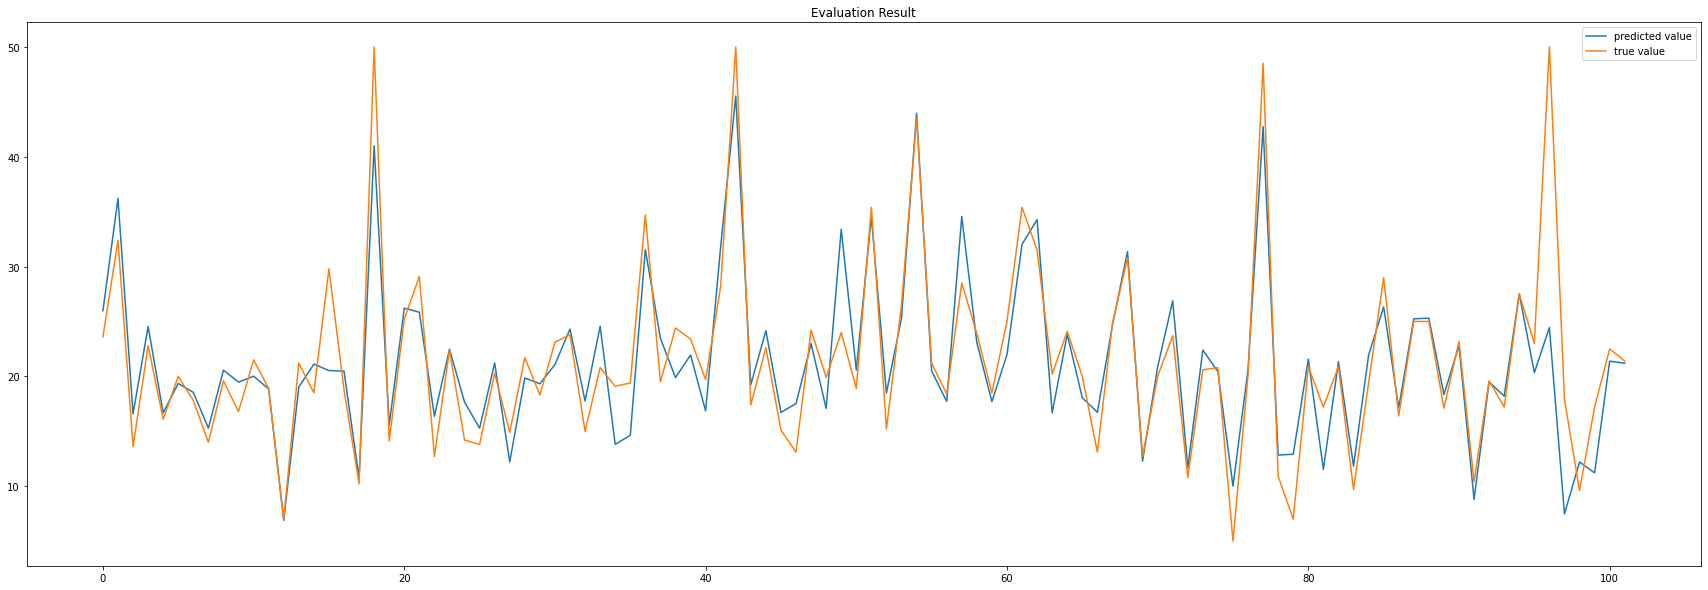

In [44]:
#visiulize the true value with predicted value (using line graph)
x = test_predictions
y = y_test
plt.figure(figsize=(30,10))
plt.plot(x, label='predicted value')
plt.plot(y, label='true value')
plt.title('Evaluation Result')
plt.legend()
plt.show()

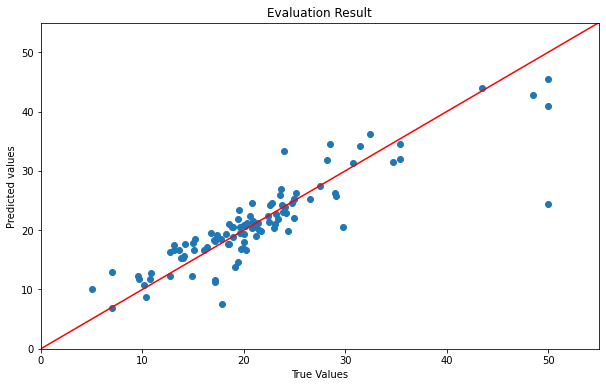

In [45]:
'''=== Visualize the model evaluation skill ==='''


# visualize the prediction uisng diagonal line
y = test_predictions #y-axis
x = y_test #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x,y) #scatter plots for x,y
ax.set(xlim=(0,55), ylim=(0, 55)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()